## Stroke Disease 



## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Data Loading and preparing

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.drop(['id'], inplace=True, axis=1)
df.shape

(5110, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Checking null values**

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# fill null values with median (we select median cause of outliers)
df.fillna(df.bmi.median(), inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Labeling Categorical data**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [9]:
print(df.gender.unique())
print(df.ever_married.unique())
print(df.Residence_type.unique())
print(df.smoking_status.unique())
print(df.work_type.unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [10]:
df['gender'].replace(to_replace={'Female':0,'Male':1, 'Other':2}, inplace=True)
df['ever_married'].replace(to_replace={'No':0,'Yes':1}, inplace=True)
df['Residence_type'].replace(to_replace={'Rural':0,'Urban':1}, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['work_type'] = encoder.fit_transform(df['work_type'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])

In [12]:
df.smoking_status.unique()

array([1, 2, 3, 0])

In [13]:
df.work_type.unique()

array([2, 3, 0, 4, 1])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(2), int64(6)
memory usage: 399.3 KB


**Checking the balance of target**

In [15]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

**Checking the outliers**

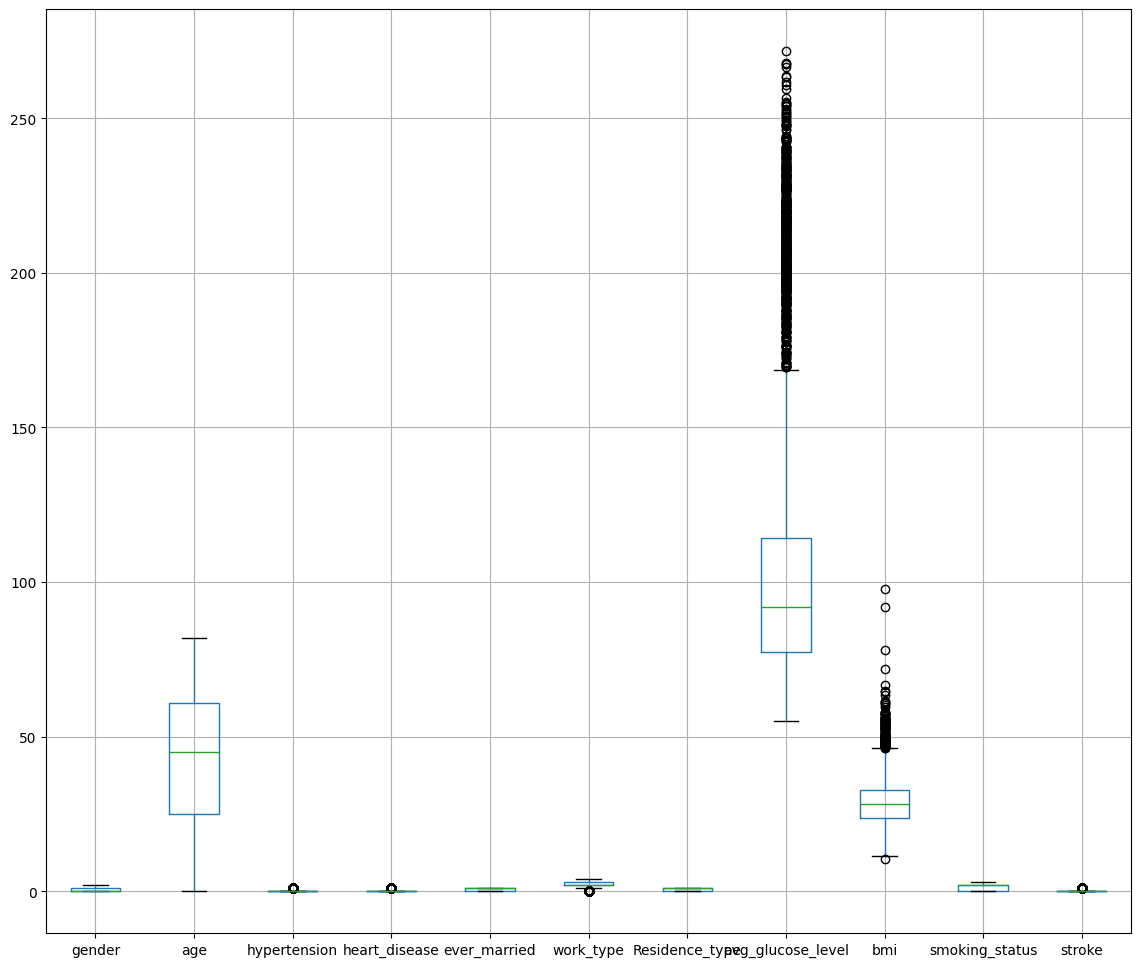

In [16]:
df.boxplot(figsize=(14,12));

**Checking the distribution**

In [17]:
df.hist(figsize=(12,8));

**Checking the corr**

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True);

## Feature Engineering

### Handling imbalanced dataset

In [19]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()

print(f'before over sampling:\n {df.stroke.value_counts()}')

X, y = os.fit_resample(df.drop(['stroke'], axis=1), df.stroke)

before over sampling:
 stroke
0    4861
1     249
Name: count, dtype: int64


In [20]:
df = X
df['stroke'] = y
print(f'After over sampling:\n {df.stroke.value_counts()}')
df.head()

After over sampling:
 stroke
1    4861
0    4861
Name: count, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


### Handling outliers

In [21]:
df.plot(kind='box', subplots=True, layout=(4,3), sharex=False,sharey=False ,figsize =(14,12));

In [22]:
df.hist(figsize = (10,10), color = "#5F9EA0");

In [23]:
def Boundary_GD(feature, name):
    '''
    We use below method if follow a Gaussian Distribution
    
    ''' 

#     uppper_boundary=feature.mean() + 3* feature.std()
#     lower_boundary=feature.mean() - 3* feature.std()
    
    uppper_boundary=feature.mean() + feature.std()
    lower_boundary=feature.mean() - feature.std()
    print(name), print(lower_boundary), print(uppper_boundary),print(feature.mean())
    print(10*'-')

In [24]:
Boundary_GD(df.avg_glucose_level, "avg_glucose_level")
Boundary_GD(df.bmi, 'bmi')

avg_glucose_level
63.36637419428737
173.73091031507283
118.5486422546801
----------
bmi
22.528788518030908
36.414289038027526
29.471538778029217
----------


In [25]:
df.loc[df['avg_glucose_level']<=63.3, 'avg_glucose_level']=63.3
df.loc[df['avg_glucose_level']>=175, 'avg_glucose_level']=175

df.loc[df['bmi']<=22.5, 'bmi']=22.5
df.loc[df['bmi']>=36.5, 'bmi']=36.5

In [26]:
df.boxplot(column=['avg_glucose_level', 'bmi'],figsize=(12,10));

### Train test split

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('stroke', axis=1)
y = df.stroke

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [28]:
X_train.shape, y_train.shape

((6805, 10), (6805,))

## Train The Model

In [29]:
def model_with_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [30]:
models = {"RandomForest": RandomForestClassifier(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression()}

model_scores = model_with_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

c:\Users\Vinay\Documents\Physician.Ai\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForest': 0.9897154610901612,
 'KNN': 0.9290366815221117,
 'SVC': 0.7610558793280768,
 'LogisticRegression': 0.7559136098731574}

In [31]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_pred = model.predict(X_test)

**Checking the accuracy**

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f'Accuracy-Score: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy-Score: 0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1457
           1       0.98      1.00      0.99      1460

    accuracy                           0.99      2917
   macro avg       0.99      0.99      0.99      2917
weighted avg       0.99      0.99      0.99      2917



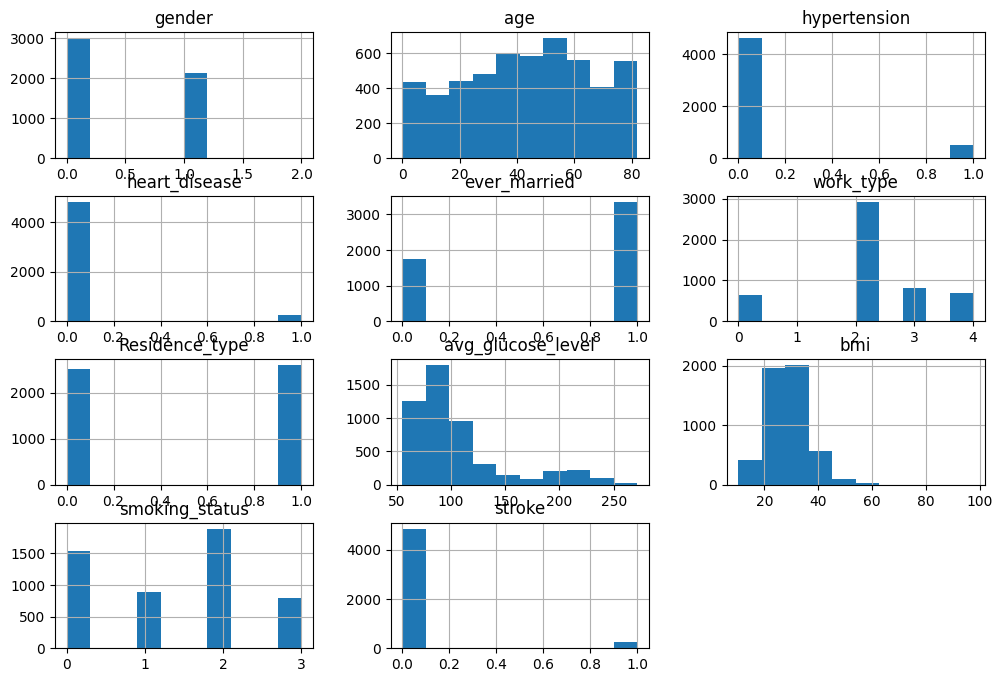

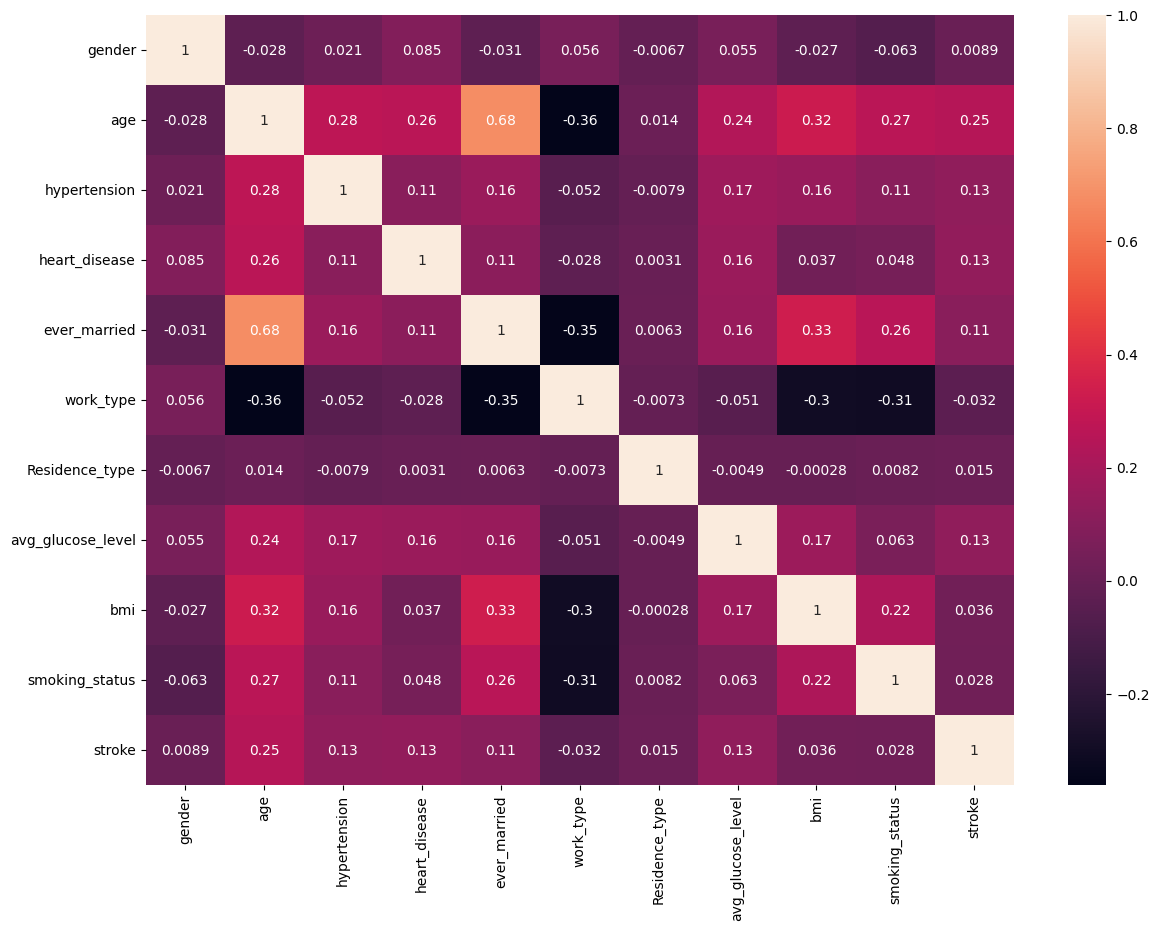

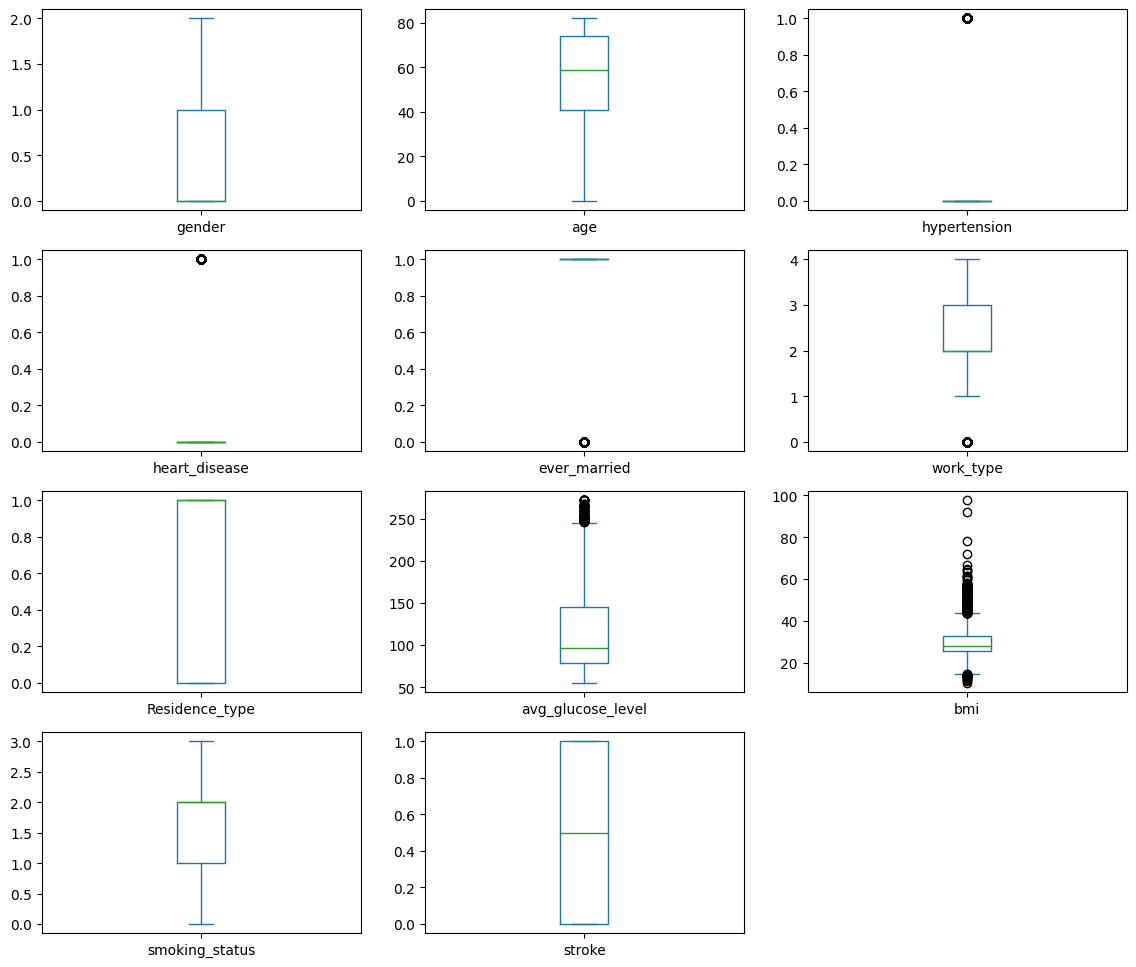

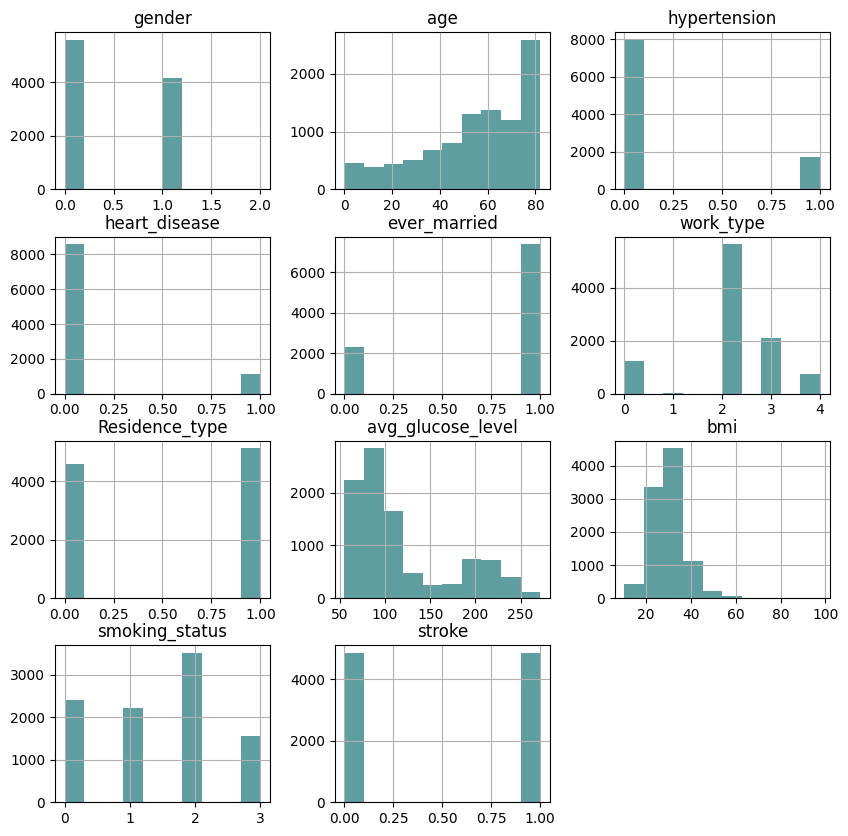

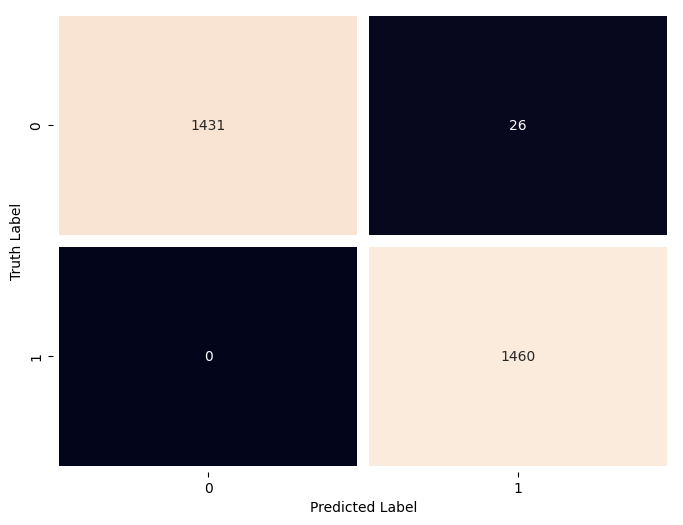

In [34]:
import seaborn as sns
c_m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, linewidths=8.5 , fmt= '', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

## Save The trained Model

In [35]:
import joblib
joblib.dump(model, 'stroke_model.pkl')

['stroke_model.pkl']